# INFX 575 Project - Milestone 2 - Data Analysis

## Preliminary Data Analysis for World University Rankings & Supplementary Datasets

#### Team Data Voyagers - Bingjie Chen, Nelson Dsouza, Maria George, Cory Shyu

#### The proposal for this project can be found at https://drive.google.com/file/d/0B2fRJCL1Xs4dOHF6M2YzZWxzN2c/view?usp=sharing

#### The below analysis has been divided into 5 parts

### Part I : University Rankings Data Analysis - Times Higher Education

In [1]:
# Importing required libraries
import pandas as pd;
import numpy as np;
import scipy as sp
from scipy import stats
import re
import matplotlib.pyplot as plt
%matplotlib inline
# change plot style
plt.style.use('ggplot')

In [2]:
# Loading data and checking dimensions and columns
school = pd.read_csv('timesData.csv')

print(school.shape)
print(school.columns)
print(school.dtypes)

(2603, 14)
Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')
world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object


The data set contains 14 variables with 2603 observations in total.

##### Variable 1: 
'world_rank' - world rank for the university. Contains rank ranges and equal ranks (eg. =94 and 201-250).

Range of 'world rank'-  By 200th, there is specific one ranking assigned to each academic institution, and there are ties among institutions. After 200th, ranking intervals are used, and the lowest ranking interval is ‘601-800’. 

##### Variable 2:
'university_name' - name of university

#### Variable 3:
'country' - country of each university

In [3]:
# Changing the data type for country
school['country'] = school['country'].astype(str)

#### Variable 4:
'teaching' - university score for teaching (the learning environment)

In [4]:
# Computing statistics for teaching
school['teaching'].describe()

count    2603.000000
mean       37.801498
std        17.604218
min         9.900000
25%        24.700000
50%        33.900000
75%        46.400000
max        99.700000
Name: teaching, dtype: float64

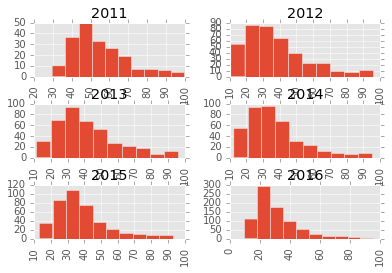

In [5]:
#Histogram for teaching score for each year
hist_teaching = school['teaching'].hist(by = school['year'])

##### Observations for variable 4 - teaching:
First of all, there are more observations in '2016' compared to earlier year. Secondly, for each year, the data is skewed to the right, which means there are a few insituion with extremely high 'teaching' scores. 

#### Variable 5:
'international' - university score international outlook (staff, students, research)

In [6]:
# Changing datatype and checking statistics
school['international'] = school['international'].replace('-', '-1').astype(float)
school['international'][school['international'] != -1].describe()

count    2594.000000
mean       52.007440
std        22.103825
min         7.100000
25%        33.425000
50%        50.300000
75%        69.000000
max       100.000000
Name: international, dtype: float64

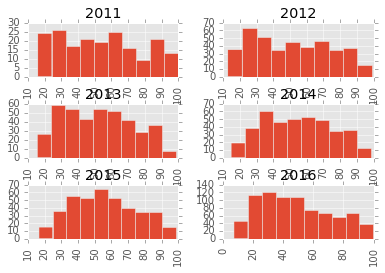

In [7]:
#Histogram for international score for each year
hist_inter = school['international'][school['international'] != -1].hist(by = school['year'])

#### Observation for Variable 5 - 'international'
There is not obvious skewness for 'international'.

#### Variable 6:
'research' - university score for research (volume, income and reputation).

In [8]:
#Checking statistics for research
school['research'].describe()

count    2603.000000
mean       35.910257
std        21.254805
min         2.900000
25%        19.600000
50%        30.500000
75%        47.250000
max        99.400000
Name: research, dtype: float64

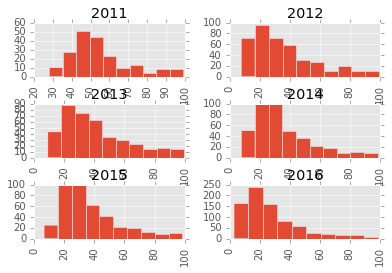

In [9]:
# Plotting histogram for research
hist_res = school['research'].hist(by = school['year'])

#### Observation for Variable 6 - 'research'
For each year, the 'research' variable is skewed to the right, especailly for the latest five years. Compared to other years, the average 'research' in 2011 is much higher, which implies that in later years there are many institutions that are not good at research joined the ranking system. 

#### Variable 7:
'total_score' - total score for university, used to determine rank.

In [10]:
# Changing datatype and replacing '-' values
school['total_score'] = school['total_score'].replace('-', '-1').astype(float)

#### Variable 8:
'citations' - university score for citations (research influence).

In [11]:
# Checking data statistics
school['citations'].describe()

count    2603.000000
mean       60.921629
std        23.073219
min         1.200000
25%        45.500000
50%        62.500000
75%        79.050000
max       100.000000
Name: citations, dtype: float64

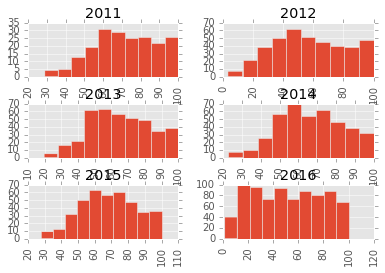

In [12]:
# Plotting histogram
hist_cit = school['citations'].hist(by = school['year'])

#### Observation for Variable 8 - 'citations'
In 2016, there are more observations fall in the lower end of the 'citation' distribution, which indicates that there are more schools that are not productive in academic paper. However, absoulte number of citations cannot represent everything. If an insitution is small, then the total number of citations will be relatively low but the ratio of citation to faculty might be high. Therefore, further analysis is needed to reach certain conclusion.

#### Variable 9:
'income' - university score for industry income (knowledge transfer).

In [13]:
# Changing datatype and showing statistics for data
school['income'] = school['income'].replace('-', '-1').astype(float)
school['income'][school['income'] != -1].describe()

count    2385.000000
mean       48.979874
std        21.179938
min        24.200000
25%        33.000000
50%        41.000000
75%        59.000000
max       100.000000
Name: income, dtype: float64

#### Observation for Variable 9 - 'income'
There are 218 missing data for this variable, which could be a probelm used for ranking. 

#### Variable 10:
'num_students' - number of students at the university.

In [14]:
# Cleaning the data and checking statistics

school['num_students'] = school['num_students'].astype(str)
school['num_students'] = school['num_students'].replace('nan', '-1')
school['num_students'] = school['num_students'].map(lambda each: each.replace(',' , ''))
school['num_students'] = school['num_students'][school['num_students'] != '-1']
school['num_students'] = school['num_students'].astype(float)
school['num_students'].describe()

count      2544.000000
mean      23873.758648
std       17675.946877
min         462.000000
25%       12637.750000
50%       20851.000000
75%       29991.000000
max      379231.000000
Name: num_students, dtype: float64

#### Variable 11:
'student_staff_ratio' - Number of students divided by number of staff.

In [15]:
# Showing statistics
school['student_staff_ratio'].describe()

count    2544.000000
mean       18.445283
std        11.458698
min         0.600000
25%        11.975000
50%        16.100000
75%        21.500000
max       162.600000
Name: student_staff_ratio, dtype: float64

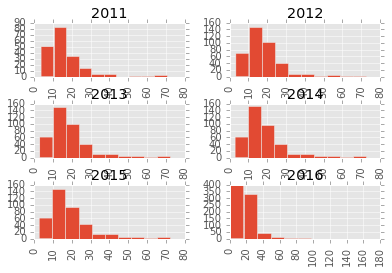

In [16]:
# Plotting Histogram
hist_ssr = school['student_staff_ratio'].hist(by = school['year'])

#### Variable 12:
'international_students' - Percentage of students who are international.

In [17]:
# Cleaning data and checking statistics
school['international_students'] = school['international_students'].astype(str)
school['international_students'] = school['international_students'].replace('nan', '-1')
school['international_students'] = school['international_students'].map(lambda each: each.replace('%' , ''))
school['international_students'] = school['international_students'][school['international_students'] != '-1']
school['international_students'] = school['international_students'].astype(float)
school['international_students'] = school['international_students'].map(lambda each: each/100.0)
school['international_students'].groupby(school['year']).count()

year
2011    193
2012    386
2013    388
2014    390
2015    389
2016    790
dtype: int64

#### Observation for Variable 12 - 'international_students'
In 2016, there are some instituions with very high percentage of international students, which is a new phenomenon and worth further analysis.  

#### Variable 13:
'female_male_ratio' - Female student to Male student ratio.

In [18]:
# Cleaning data

school['female_male_ratio'] = school['female_male_ratio'].astype(str)
school['female_male_ratio'] = school['female_male_ratio'].replace('nan', '')
school['female_male_ratio'] = school['female_male_ratio'].replace('-', '')
school['female_male_ratio'] = school['female_male_ratio'].map(lambda each: each.split(':')) 

In [19]:
# Function to check instition with only females
female = []
for each in school['female_male_ratio']:
    if each == ['']:
        female.append('NaN')
    else: 
        try: 
            female.append(float(each[0].strip())/float(each[1].strip()))
        except ZeroDivisionError:
            female.append('All women')
            
school['female_to_male'] = female
school[school['female_to_male'] == 'All women']

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,female_to_male
1760,351-400,Ewha Womans University,South Korea,23.5,36.0,18.0,57.6,61.3,-1,17625,14.4,0.06,"[100 , 0]",2015,All women
2227,401-500,Ewha Womans University,South Korea,23.9,34.3,18.3,50.4,57.6,-1,17625,14.4,0.06,"[100 , 0]",2016,All women


#### Observation 1 for Variable 13 - 'female_male_ratio'
In 2015 and 2016, there is one instituion that enrolls only female students.

In [20]:
school[school['female_to_male'] == 'NaN'].groupby(school['year']).size()

year
2011    22
2012    40
2013    36
2014    36
2015    38
2016    64
dtype: int64

#### Observation 2 for Variable 13 - 'female_male_ratio'

The above is the number of institutions that don't have input for 'female_to_male' ratio.

In [21]:
# Cleaning data and checking statistics
school['female_to_male'] =  school['female_to_male'][school['female_to_male'] != 'All women']
school['female_to_male'] =  school['female_to_male'][school['female_to_male'] != 'NaN']
school['female_to_male'] = school['female_to_male'].astype(float)
school['female_to_male'].describe()

count    2365.000000
mean        1.068446
std         0.406535
min         0.010101
25%         0.851852
50%         1.083333
75%         1.272727
max         3.545455
Name: female_to_male, dtype: float64

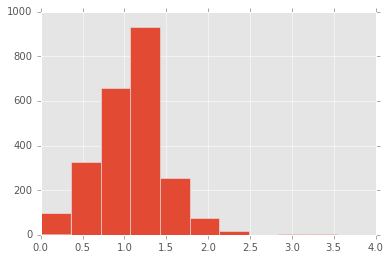

In [22]:
# Plotting Histogram
hist_mfr = school['female_to_male'].hist()

#### Observation 3 for Variable 13 - 'female_male_ratio'
The mean of 'female_to_male' ratio is close to 1 which mean that there is a good balance between male and female students at university on average. 

#### Holistic Analysis 1 - Number of institutions in the ranking system broke down into countries

In [23]:
#grouping by countries
school.groupby(school['country']).size().sort_values(ascending=False)

country
United States of America     659
United Kingdom               300
Germany                      152
Australia                    117
Canada                       108
Japan                         98
Italy                         94
China                         83
Netherlands                   75
France                        73
South Korea                   57
Spain                         57
Sweden                        57
Taiwan                        57
Switzerland                   47
Belgium                       37
Hong Kong                     34
Turkey                        33
Finland                       32
Austria                       31
Republic of Ireland           31
India                         30
New Zealand                   30
Denmark                       29
Brazil                        25
Norway                        21
South Africa                  20
Russian Federation            20
Israel                        19
Portugal                      18
  

#### Holistic Analysis 2 - Scatter plot analysis

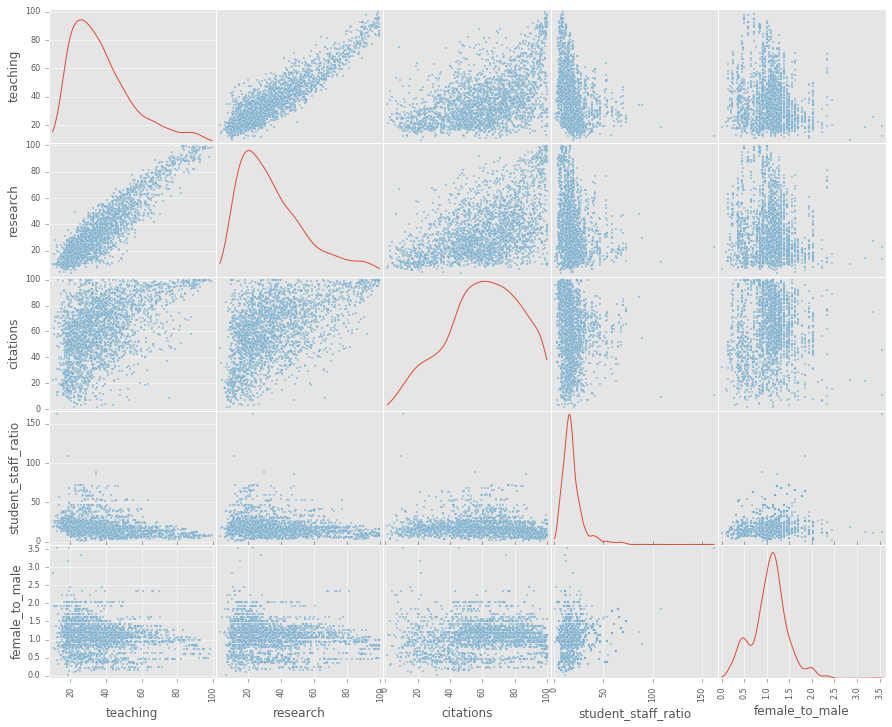

In [24]:
# Creating scatter plot matrix for below variables
school_sub = school[['teaching',  'research', 'citations', 'student_staff_ratio',  'female_to_male']]

fig_size = plt.rcParams["figure.figsize"]
fig_size
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

sctr = pd.scatter_matrix(school_sub, diagonal='kde')

#### Observation on scatter plot
From the scatterplots, we can tell there is a strong positive realtionship between 'reseach' and 'teaching'. And in general, 'reseach', 'teaching', and 'student_staff_ratio' is skewed to the right, and 'citation' is skewed to the left, and 'female_to_male' has roughly bell shape. 

#### Holistic Analysis 3 - Multiple Histograms of International Students based on countries

In [25]:
school_USA = school[school['country'] == 'United States of America']
school_UK = school[school['country'] == 'United Kingdom']
school_AUS = school[school['country'] == 'Australia']
school_JPN = school[school['country'] == 'Japan']
school_ITA = school[school['country'] == 'Italy']
school_CHN = school[school['country'] == 'China']

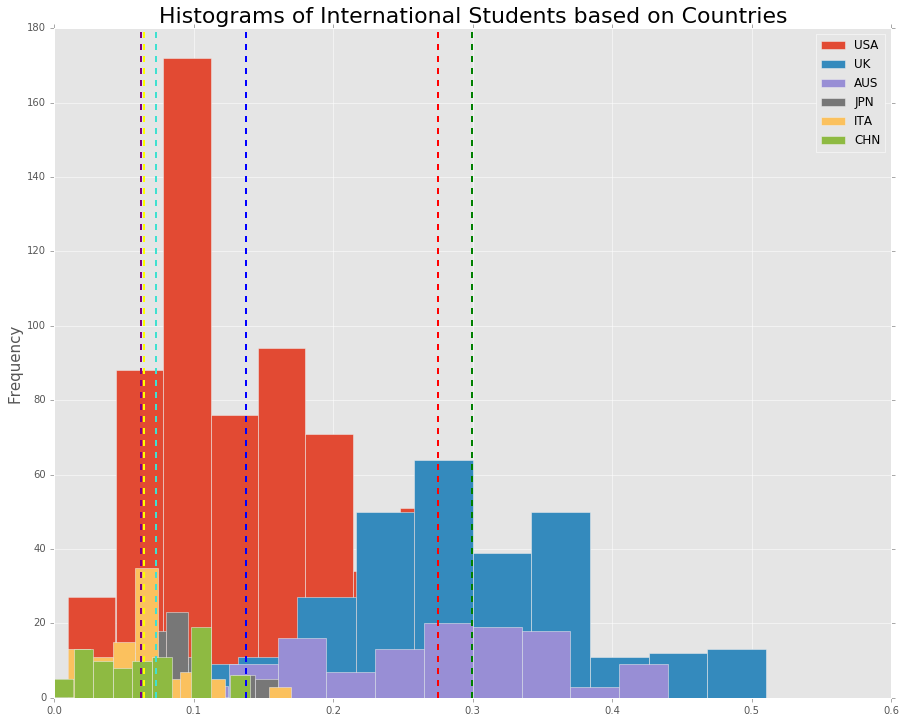

In [26]:
school_USA['international_students'].hist(label = 'USA')
plt.axvline(school_USA['international_students'].mean(), color = 'b', linestyle='dashed', linewidth=2)
school_UK['international_students'].hist(label = 'UK')
plt.axvline(school_UK['international_students'].mean(), color = 'g', linestyle='dashed', linewidth=2)
school_AUS['international_students'].hist(label = 'AUS')
plt.axvline(school_AUS['international_students'].mean(), color = 'r', linestyle='dashed', linewidth=2)
school_JPN['international_students'].hist(label = 'JPN')
plt.axvline(school_JPN['international_students'].mean(), color = 'turquoise', linestyle='dashed', linewidth=2)
school_ITA['international_students'].hist(label = 'ITA')
plt.axvline(school_ITA['international_students'].mean(), color = 'purple', linestyle='dashed', linewidth=2)
school_CHN['international_students'].hist(label = 'CHN')
plt.axvline(school_CHN['international_students'].mean(), color = 'yellow', linestyle='dashed', linewidth=2)

plt.title('Histograms of International Students based on Countries', fontsize=22)
plt.ylabel('Frequency', fontsize = 15)
plt.legend(loc='upper right')
plt.show()

#### Observation on Multiple Histogram chart
On average, instituions at UK involved in the ranking system have highest percentage of international students. 

#### Holistic Analysis 4 - Scatter Plot for Research vs Income based on Year

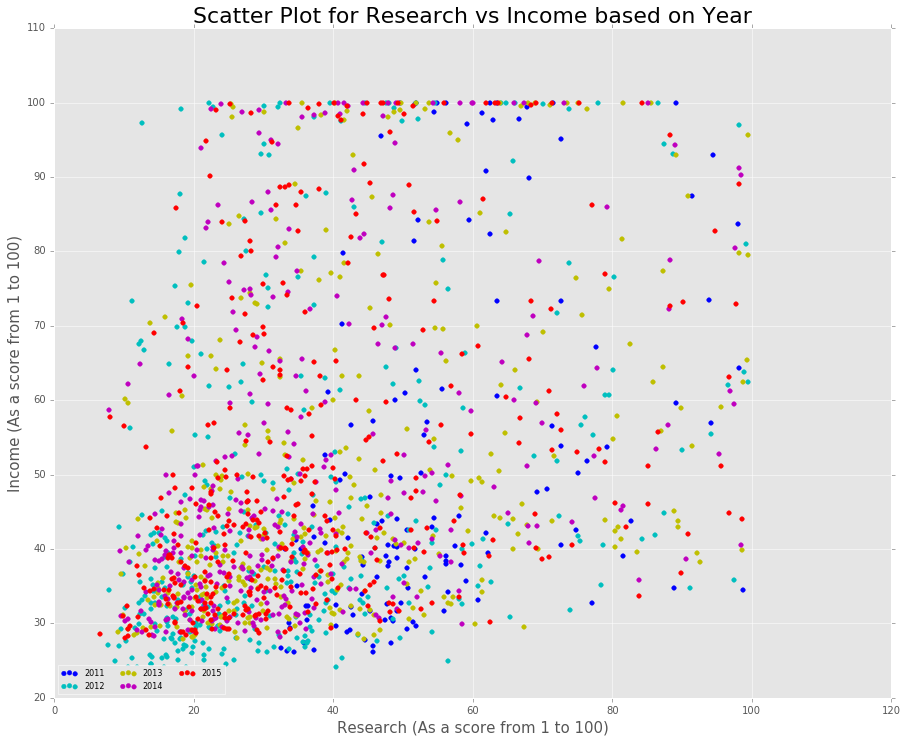

In [27]:
school_temp = school[school['income'] != -1]
school_2011 = school_temp[school_temp['year'] == 2011]
school_2012 = school_temp[school_temp['year'] == 2012]
school_2013 = school_temp[school_temp['year'] == 2013]
school_2014 = school_temp[school_temp['year'] == 2014]
school_2015 = school_temp[school_temp['year'] == 2015]

colors=['b', 'c', 'y', 'm', 'r']
fig_2011 = plt.scatter(school_2011['research'], school_2011['income'], color=colors[0])
fig_2012 = plt.scatter(school_2012['research'], school_2012['income'], color=colors[1])
fig_2013 = plt.scatter(school_2013['research'], school_2013['income'], color=colors[2])
fig_2014 = plt.scatter(school_2014['research'], school_2014['income'], color=colors[3])
fig_2015 = plt.scatter(school_2015['research'], school_2015['income'], color=colors[4])
plt.legend((fig_2011,fig_2012,fig_2013,fig_2014,fig_2015),('2011', '2012','2013', '2014', '2015'),
           numpoints=1, loc='lower left', ncol=3, fontsize=8)
plt.xlabel("Research (As a score from 1 to 100)", fontsize = 15)
plt.ylabel("Income (As a score from 1 to 100)", fontsize = 15)
plt.title("Scatter Plot for Research vs Income based on Year", fontsize=22)

#### Observation on scatter plot
We can see that there seems to be a direct correlation between the Income of a University and the Research done at the University.

### Part II : Supplementary Data 1 Analysis - Education Attainment

In [28]:
# load educational attainment data
edu_att_df= pd.read_csv('educational_attainment_supplementary_data.csv')
# remove null rows
edu_att_df = edu_att_df.dropna(subset = ['series_name'])
# remove years 1985-2004
edu_att_df = edu_att_df.drop(edu_att_df.columns[[range(2, 19)]], axis=1)

In [29]:
# extract data source
def get_source(string):
    string = string[0:string.find(':')]
    return string

# extract age bracket
def get_age(string):
    string = string[re.search(r"[0-9]", string).start():]
    string = string[0:string.find(' ')]
    if ',' in string:
        string = string.replace(',', '')
    return string

# extract gender information
def get_gender(string):
    if 'Female' in string or 'female' in string:
        gender = 'female'
    elif 'Male' in string or 'male' in string:
        gender = 'male'
    else:
        gender = 'total'
    return gender

# extract education level information
def get_level(string):
    if 'secondary' in string or 'Secondary' in string:
        level = 'secondary'
    elif 'primary' in string or 'Primary' in string:
        level = 'primary'
    elif 'tertiary' in string or 'Tertiary' in string or 'bachelor' in string or 'master' in string or 'doctoral' in string:
        level = 'tertiary'
    else:
        level = 'NA'
    return level

# extract data type
def data_type(string):
    if string.split()[1] == 'Percentage':
        dtype = 'Percentage of population'
    elif string.split()[1] == 'Average':
        dtype = 'Average year'
    elif string.split()[1] == 'Population':
        dtype = 'Population in thousands'
    else:
        dtype = 'Others'
    return dtype

In [30]:
#Inserting source age and gender information
edu_att_df['source'] = edu_att_df['series_name'].apply(get_source)
edu_att_df['age_group'] = edu_att_df['series_name'].apply(get_age)
edu_att_df['gender'] = edu_att_df['series_name'].apply(get_gender)
edu_att_df['level'] = edu_att_df['series_name'].apply(get_level)
edu_att_df['type'] = edu_att_df['series_name'].apply(data_type)

# Tidy data
edu_tidy = pd.melt(edu_att_df, id_vars=['country_name', 'series_name', 'source', 'type', 'age_group', 'gender', 'level'], 
        value_vars=['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'])
edu_tidy.rename(columns={'variable': 'year'}, inplace=True)
edu_tidy = edu_tidy.dropna(subset = ['value'])
edu_tidy.head(10)

,country_name,series_name,source,type,age_group,gender,level,year,value
0,Afghanistan,"Barro-Lee: Average years of primary schooling,...",Barro-Lee,Average year,15+,female,primary,2005,0.86
1,Afghanistan,"Barro-Lee: Average years of primary schooling,...",Barro-Lee,Average year,15+,total,primary,2005,2.18
2,Afghanistan,"Barro-Lee: Average years of primary schooling,...",Barro-Lee,Average year,15-19,female,primary,2005,1.01
3,Afghanistan,"Barro-Lee: Average years of primary schooling,...",Barro-Lee,Average year,15-19,total,primary,2005,2.26
4,Afghanistan,"Barro-Lee: Average years of primary schooling,...",Barro-Lee,Average year,20-24,female,primary,2005,2.00
5,Afghanistan,"Barro-Lee: Average years of primary schooling,...",Barro-Lee,Average year,20-24,total,primary,2005,3.93
6,Afghanistan,"Barro-Lee: Average years of primary schooling,...",Barro-Lee,Average year,25+,female,primary,2005,0.63
7,Afghanistan,"Barro-Lee: Average years of primary schooling,...",Barro-Lee,Average year,25+,total,primary,2005,1.69
8,Afghanistan,"Barro-Lee: Average years of primary schooling,...",Barro-Lee,Average year,25-29,female,primary,2005,1.26
9,Afghanistan,"Barro-Lee: Average years of primary schooling,...",Barro-Lee,Average year,25-29,total,primary,2005,2.48


C:\Users\Nelson\Anaconda3\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


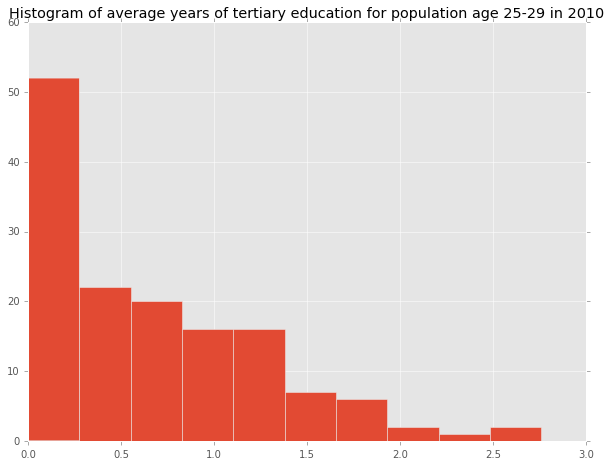

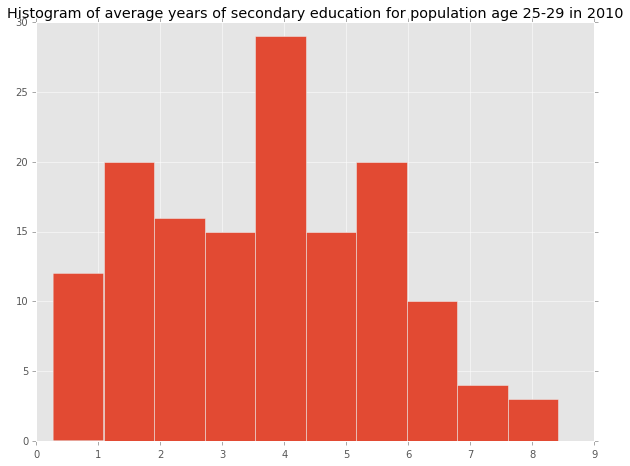

In [31]:
# visualize some data

# filter data using a set of criteria
tertiary_data = edu_tidy[edu_tidy['gender'] ==
                         'total'][edu_tidy['level'] == 'tertiary'][edu_tidy['type'] ==
                                                                   'Average year'][edu_tidy['year'] ==
                                                                                   '2010'][edu_tidy['age_group']== '25-29']
secondary_data = edu_tidy[edu_tidy['gender'] ==
                          'total'][edu_tidy['level'] == 'secondary'][edu_tidy['type'] ==
                                                                     'Average year'][edu_tidy['year'] ==
                                                                                     '2010'][edu_tidy['age_group']== '25-29']

# plot histogram
tertiary_data[['value']].hist(figsize=(10,7.5))
plt.title('Histogram of average years of tertiary education for population age 25-29 in 2010')
secondary_data[['value']].hist(figsize=(10, 7.5))
plt.title('Histogram of average years of secondary education for population age 25-29 in 2010')

### Analysis of the Education Attainment Dataset:

The education attainment data come from two sources, Barro-Lee and UIS. The data is organized such that for each line of education attainment information, the type of data along with source, age group, and gender breakdown is provided. For different countries, data can only be available for certain years.

Due to the nature of data, we have selected very specific group with different education level for all the available countries to visualize the distribution of education attainment. As we develop our research questions, we will take a deeper look at the education attainment data.

### Part III : Supplementary Data 2 Analysis - Education Expenditure

In [32]:
# Reading the data
raw_data = pd.read_csv("C:/Users/Nelson/Desktop/education_expenditure_supplementary_data.csv", 
                       sep = ",", encoding='utf8', engine='python')
raw_data = pd.read_csv("education_expenditure_supplementary_data.csv", sep = ",", encoding='utf8', engine='python')
print(raw_data.shape)
# Displaying the first few rows of the datasetz
raw_data.head()

(333, 9)


,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
0,OECD Average,All Institutions,Public,4.9,4.9,5.0,5.4,5.4,5.3
1,Australia,All Institutions,Public,4.5,4.6,4.3,4.5,4.6,4.3
2,Austria,All Institutions,Public,5.3,5.4,5.2,5.7,5.6,5.5
3,Belgium,All Institutions,Public,5.0,5.1,5.8,6.4,6.4,6.4
4,Canada,All Institutions,Public,5.8,5.2,4.8,5.0,5.2,NaN


The education expenditure suplementary dataset contains the details about the GDP spent on edcation by different countries for 6 different years. The dataset contains 333 observations of nine different variables. The variables include:

1. country - A set of OECD countries, plus Brazil and the Russian Federation, plus an OECD average.

2.institute_type - All Institutes, Elementary and secondary institutions, Higher education institutions.

3.direct_expenditure_type - Public direct expenditure, private direct expenditure, or total (public + private) direct expenditure. 

4.1995, 2000, 2005, 2009, 2010, 2011 - years


In [33]:
#nan_2011 = raw_data['2011'].isnull().values
#count_nan = len(raw_data) - raw_data['2011'].count()

# Removing the OECD average column from the dataset
raw_data = raw_data[raw_data.country != 'OECD Average']

# Handling missing values
# Removing the countries which dont have values for all the institute_type, expenditure_type columns
rd = pd.DataFrame(raw_data.groupby('country').count())
ac = rd[rd['2011'] == 9]
ac = list(ac.index.get_level_values(0))
final_data = raw_data[raw_data['country'].isin(ac)]
# Removing all the years except 2011
final_data.drop(final_data.columns[[3,4,5,6,7]], axis=1, inplace=True)

# Copying the data for further analysis
final_data.to_csv('Filtered_data.csv')
# Displaying the rows of the final filtered dataset
final_data.head()

C:\Users\Nelson\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,country,institute_type,direct_expenditure_type,2011
1,Australia,All Institutions,Public,4.3
2,Austria,All Institutions,Public,5.5
3,Belgium,All Institutions,Public,6.4
5,Chile,All Institutions,Public,3.9
6,Czech Republic,All Institutions,Public,4.4


The dataset contains the GDP spent on six different years. However, GDP spent through private and total expenditure are only available for 2011. Also, the main world ranking dataset contains the ranking for 2011 and not for any other years mentioned in this supplementary data. Thus, the data is cleaned to handle the missing values and removing unused years columns.

To maintain reliability of the data, we decided to include only the countries which had theor GDP recorded for all the three different institution types (All institutions, Elementary, Higher) and all the different expenditure types (public, private, total). Thus, only the countries with 9 records were included in the analysis.

In [34]:
# Grouping by the institute_type and direct_expenditure_type to observe 
#the country which spent minimum GDP on education
final_data.groupby(['institute_type', 'direct_expenditure_type']).min()

country  \
institute_type                         direct_expenditure_type                         
All Institutions                       Private                    Russian Federation   
                                       Public                     Russian Federation   
                                       Total                      Russian Federation   
Elementary and Secondary Institutions  Private                    Russian Federation   
                                       Public                     Russian Federation   
                                       Total                      Russian Federation   
Higher Education Institutions          Private                    Russian Federation   
                                       Public                     Russian Federation   
                                       Total                      Russian Federation   

                                                                2011  
institute_type                         direct_expenditure_type        
All Institutions                       Private                   0.1  
                                       Public                    3.6  
                                       Total                     4.4  
Elementary and Secondary Institutions  Private                   0.0  
                                       Public                    2.0  
                                       Total                     2.1  
Higher Education Institutions          Private                   0.1  
                                       Public                    0.5  
                                       Total                     1.0

In [35]:
# Grouping by the institute_type and direct_expenditure_type to observe 
#the country which spent maximum GDP on education
final_data.groupby(['institute_type', 'direct_expenditure_type']).max()

country  \
institute_type                         direct_expenditure_type                  
All Institutions                       Private                  United States   
                                       Public                   United States   
                                       Total                    United States   
Elementary and Secondary Institutions  Private                  United States   
                                       Public                   United States   
                                       Total                    United States   
Higher Education Institutions          Private                  United States   
                                       Public                   United States   
                                       Total                    United States   

                                                                2011  
institute_type                         direct_expenditure_type        
All Institutions                       Private                   2.8  
                                       Public                    7.5  
                                       Total                     7.9  
Elementary and Secondary Institutions  Private                   0.8  
                                       Public                    4.8  
                                       Total                     5.4  
Higher Education Institutions          Private                   1.9  
                                       Public                    1.9  
                                       Total                     2.7

In [36]:
# Grouping by the institute_type and direct_expenditure_type to observe 
#the average GDP on education
final_data.groupby(['institute_type', 'direct_expenditure_type']).mean()

2011
institute_type                         direct_expenditure_type          
All Institutions                       Private                  0.889286
                                       Public                   5.182143
                                       Total                    6.071429
Elementary and Secondary Institutions  Private                  0.285714
                                       Public                   3.500000
                                       Total                    3.778571
Higher Education Institutions          Private                  0.496429
                                       Public                   1.085714
                                       Total                    1.575000

In [37]:
# Grouping by the institute_type and direct_expenditure_type to observe 
# the standard deviation of GDP on education
final_data.groupby(['institute_type', 'direct_expenditure_type']).std()

2011
institute_type                         direct_expenditure_type          
All Institutions                       Private                  0.706761
                                       Public                   0.974890
                                       Total                    0.963350
Elementary and Secondary Institutions  Private                  0.220629
                                       Public                   0.703431
                                       Total                    0.716140
Higher Education Institutions          Private                  0.516026
                                       Public                   0.330784
                                       Total                    0.420427

In [38]:
# Grouping by the institute_type and direct_expenditure_type to observe 
#the median GDP on education
final_data.groupby(['institute_type', 'direct_expenditure_type']).median()

2011
institute_type                         direct_expenditure_type      
All Institutions                       Private                  0.70
                                       Public                   5.15
                                       Total                    6.15
Elementary and Secondary Institutions  Private                  0.30
                                       Public                   3.50
                                       Total                    3.85
Higher Education Institutions          Private                  0.30
                                       Public                   1.00
                                       Total                    1.50

#### Analysis of the Education Expenditure Dataset:

From the descriptive statistcal analysis performed above, the following observations were made:

1. Russian Federation has alloted the minimum GDP for education. For all institutions category, Russia alloted 0.1 of its GDP under Private expenditure and 3.6 under Public expenditure.

2. United States has alloted the maximum GDP for education with 2.8 % alloted in private sector and 7.5% in public sector. 

3. On average, the countries has alloted a total of 6.07% of theor GDP on education. On further breaking down, the average GDP alloted by the countries for Elementary and Secondary Institution is 3.77 and for  Higher Education Institutions is 1.575

4. While analyzing the standard deviation, it was observed that the maximum variation in the data was observed in the All Institutions category, with the Total GDP having a standard deviation of 0.963. The std deviation of teh total GDp spent in the Elementary and Secondary Institution is 0.716 and for  Higher Education Institutions is 0.420

5. The median value of the GDP spent under All Institutions for the private sector is 0.70 and for the public sector is 5.15

Thus, in conclusion, it is observed that the GDP alloted through public expenditure type is more than private expenditure type. Also, on avaerage the Elementary and Secondary Institution are alloted mre GDP than Higher Education Institutions.

#### Exploratory Data Analysis for Education Expenditure Dataset:

The exploratory data analysis has been done in Tableau to analyze the GDP spent by different countries based on institution type and direct expenditure type.

Link to the visualization:
https://public.tableau.com/profile/publish/PercentageofGDPonEducationExpenditure/Dashboard1#!/publish-confirm

From the visualization, it can be observed that United States, Republic of Korea (3.2), New Zealand(3.156) are the countries on the higher spectrum alloting more GDP for education. Countries like Russian Federation (1.8), Slovak Republic(1.811) and Italy(1.933) are the countries on the lower edge alloing miminum GDP to education. 

### Part IV - Salient aspects of the data

- There are way more observations in year 2016 than earlier years. In terms of attributes used for ranking, they are generally more spread out in 2016 than other years, which makes the ranking more comprehensive. More variations will help us better understand the importance of each in university ranking. 

- When looking at the distribution of international student percentage, the min, 25%, median, 50%, and 75% percentile in 2016 are lower than all those in other years while it gives the biggest maximum percentage. It would be interesting to further analyze the institution that fall between 75% and the maximum. 

### Part V - List of future tasks to perform in analyzing dataset

- As we have mentioned above, in later years, some variables have more extreme values. It would be interesting to pick up institutions that fall in the bottom and top 5% of the distribution of the core features. And we’d like to compare the distributions of other features and relationships among features for the two groups. 
- Now the ranking is on the institution level, but we are interested in grouping institutions into regions, i.e. North America, Asia, Europe, Mid East, and see how features distribute within the regions and if they are systematically different among regions. Furthermore, we can analyze data on the institution level but include region variable in the analysis to absorb effects of each region that cannot be reflected in the feature included, which is also a way to identify regional bias. 
- Based on the nature of features used for ranking and the data visualization of the actual data, there is strong correlation between features, such as teaching and citation. Therefore, it is worth checking collinearity among features and conduct principal component analysis to improve model simplicity and interpretation. 
- Given the gender information in the data, we could potentially look at how gender plays a role in education attainment
- Given groups of countries in the data, we could do education attainment trend analysis on specific countries and compare with country university ranking
- We can run regression analysis on ranking vs country, % gdp spent on education, education attainment
